In [7]:
# -*- coding: utf-8 -*-
"""Intrusion detection system usung Kdd dataset .ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1IGjJNu5jAsB5qjPrXJ2RJv1lZ98_8J7O
"""

# intrsuion detection using KD99 Dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
from tensorflow.keras.utils import get_file

import matplotlib.pyplot as plt
from matplotlib.pyplot import*
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
import seaborn as sns
import datetime as dt



In [8]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


In [9]:
try:
      path = get_file('/content/drive/MyDrive/Colab Notebooks/ANN Dataset/kddcup.data_10_percent (3).gz', origin=\
    'http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html'\
    '/kddcup.data_10_percent.gz',archive_format=None)
except:
    print('Error downloading')
    raise

path="/content/drive/MyDrive/Colab Notebooks/ANN Dataset/kddcup.data_10_percent (3).gz"
df = pd.read_csv(path)
df.head(70)

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,tcp,http,SF,224,1658,0,0,0,0,...,255,1.0,0.0,0.01,0.04,0.0,0.0,0.0,0.0,normal.
66,0,tcp,http,SF,224,3609,0,0,0,0,...,255,1.0,0.0,0.02,0.04,0.0,0.0,0.0,0.0,normal.
67,0,tcp,http,SF,230,2118,0,0,0,0,...,255,1.0,0.0,0.02,0.04,0.0,0.0,0.0,0.0,normal.
68,0,tcp,http,SF,239,304,0,0,0,0,...,255,1.0,0.0,0.01,0.04,0.0,0.0,0.0,0.0,normal.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df.info()
# getting the characteristic information of the dataset
df.head(70)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  object 
 2   http     494020 non-null  object 
 3   SF       494020 non-null  object 
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.12     494020 non-null  int64  
 18  0.13     494020 non-null  int64  
 19  0.14     494020 non-null  int64  
 20  0.15     494020 non-null  

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,tcp,http,SF,224,1658,0,0,0,0,...,255,1.0,0.0,0.01,0.04,0.0,0.0,0.0,0.0,normal.
66,0,tcp,http,SF,224,3609,0,0,0,0,...,255,1.0,0.0,0.02,0.04,0.0,0.0,0.0,0.0,normal.
67,0,tcp,http,SF,230,2118,0,0,0,0,...,255,1.0,0.0,0.02,0.04,0.0,0.0,0.0,0.0,normal.
68,0,tcp,http,SF,239,304,0,0,0,0,...,255,1.0,0.0,0.01,0.04,0.0,0.0,0.0,0.0,normal.


In [17]:
df.info()
# getting the characteristic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  object 
 2   http     494020 non-null  object 
 3   SF       494020 non-null  object 
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.12     494020 non-null  int64  
 18  0.13     494020 non-null  int64  
 19  0.14     494020 non-null  int64  
 20  0.15     494020 non-null  

In [18]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

df[0:19289]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.00,0.00,0.02,0.00,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,0,tcp,smtp,SF,1204,499,0,0,0,0,...,242,0.94,0.04,0.01,0.01,0.0,0.0,0.0,0.0,normal.
19285,0,udp,private,SF,28,0,0,1,0,0,...,1,0.01,0.05,0.01,0.00,0.0,0.0,0.0,0.0,teardrop.
19286,0,udp,private,SF,28,0,0,3,0,0,...,2,0.03,0.05,0.03,0.00,0.0,0.0,0.0,0.0,teardrop.
19287,0,udp,private,SF,28,0,0,3,0,0,...,3,0.04,0.05,0.04,0.00,0.0,0.0,0.0,0.0,teardrop.


In [19]:
#Analyzing the dataset
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 494020 rows.
The number of data points are: 494020
The number of features are: 42
The different type of output labels are: {'nmap.', 'imap.', 'portsweep.', 'satan.', 'guess_passwd.', 'land.', 'smurf.', 'multihop.', 'back.', 'teardrop.', 'neptune.', 'ipsweep.', 'loadmodule.', 'spy.', 'perl.', 'pod.', 'ftp_write.', 'rootkit.', 'phf.', 'warezmaster.', 'normal.', 'buffer_overflow.', 'warezclient.'}
The number of different output labels are: 23


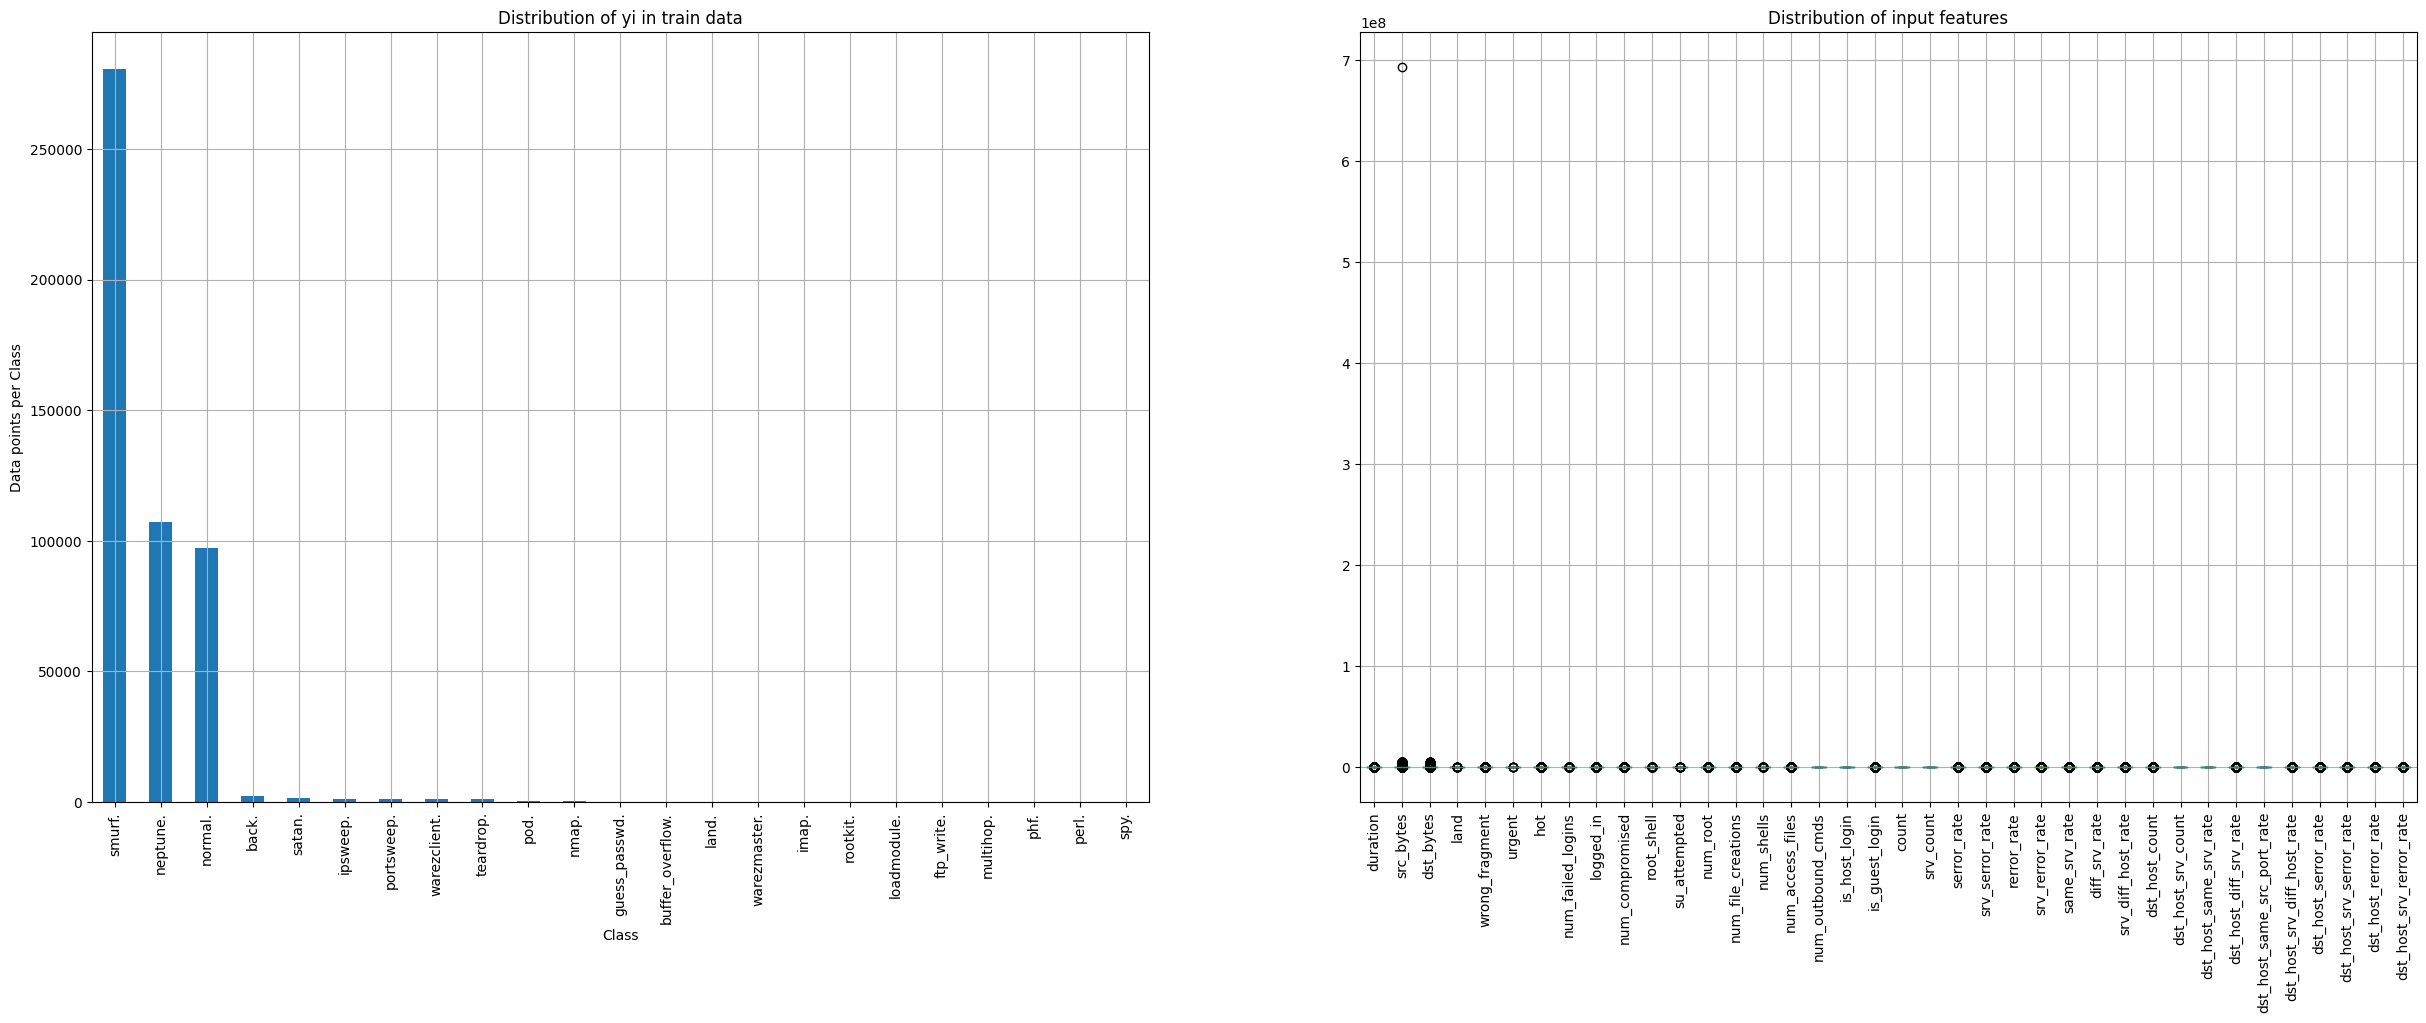

In [20]:
# Exploratory data analysis
plt.figure(figsize=(30,10))

# Plot distribution of outcome variable
class_distribution = df['outcome'].value_counts()
plt.subplot(1,2,1)
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()

# Plot distribution of input features
plt.subplot(1,2,2)
df.drop('outcome',axis=1).boxplot()
plt.title('Distribution of input features')
plt.xticks(rotation=90)


plt.show()

In [ ]:
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')
    
#df.groupby('outcome')['outcome'].count() #this could also be used if you want no-fromatted for above.

ENCODING = 'utf-8'

Number of data points in class smurf. : 280790 ( 56.838 %)
Number of data points in class neptune. : 107201 ( 21.7 %)
Number of data points in class normal. : 97277 ( 19.691 %)
Number of data points in class back. : 2203 ( 0.446 %)
Number of data points in class satan. : 1589 ( 0.322 %)
Number of data points in class ipsweep. : 1247 ( 0.252 %)
Number of data points in class portsweep. : 1040 ( 0.211 %)
Number of data points in class warezclient. : 1020 ( 0.206 %)
Number of data points in class teardrop. : 979 ( 0.198 %)
Number of data points in class pod. : 264 ( 0.053 %)
Number of data points in class nmap. : 231 ( 0.047 %)
Number of data points in class guess_passwd. : 53 ( 0.011 %)
Number of data points in class buffer_overflow. : 30 ( 0.006 %)
Number of data points in class land. : 21 ( 0.004 %)
Number of data points in class warezmaster. : 20 ( 0.004 %)
Number of data points in class imap. : 12 ( 0.002 %)
Number of data points in class rootkit. : 10 ( 0.002 %)
Number of data point

In [11]:
def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

In [12]:
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [ ]:
# Analyze KDD-99
analyze(df)

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


In [14]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


In [21]:
# Now encode the feature vector
encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

# display 10 rows
df.dropna(inplace=True,axis=1)
df[0:10]
# This is the numeric feature vector, as it goes to the neural net

<ipython-input-14-f33293986f53>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
<ipython-input-14-f33293986f53>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
<ipython-input-14-f33293986f53>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
0,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
1,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
2,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
3,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
5,-0.067792,-0.002847,0.032430,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
6,-0.067792,-0.002901,0.097411,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
7,-0.067792,-0.002849,-0.021717,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
8,-0.067792,-0.002847,-0.002498,-0.04772,-0.002571,1.234467,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
9,-0.067792,-0.002849,-0.007401,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0


In [23]:
# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

df.groupby('outcome')['outcome'].count()

outcome
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.              1247
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  231
normal.              97277
perl.                    3
phf.                     4
pod.                   264
portsweep.            1040
rootkit.                10
satan.                1589
smurf.              280790
spy.                     2
teardrop.              979
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

In [24]:
# Create a test/train split.  35% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.35, random_state=42)

Epoch 1/20
10035/10035 - 18s - loss: 0.2199 - val_loss: 0.0541 - 18s/epoch - 2ms/step
Epoch 2/20
10035/10035 - 16s - loss: 0.0478 - val_loss: 0.0421 - 16s/epoch - 2ms/step
Epoch 3/20
10035/10035 - 15s - loss: 0.0465 - val_loss: 0.0388 - 15s/epoch - 2ms/step
Epoch 4/20
10035/10035 - 16s - loss: 0.0382 - val_loss: 0.0363 - 16s/epoch - 2ms/step
Epoch 5/20
10035/10035 - 15s - loss: 0.0347 - val_loss: 0.0434 - 15s/epoch - 1ms/step
Epoch 6/20
10035/10035 - 16s - loss: 0.0330 - val_loss: 0.0369 - 16s/epoch - 2ms/step
Epoch 7/20
10035/10035 - 16s - loss: 0.0332 - val_loss: 0.0336 - 16s/epoch - 2ms/step
Epoch 8/20
10035/10035 - 15s - loss: 0.0330 - val_loss: 0.0332 - 15s/epoch - 2ms/step
Epoch 9/20
10035/10035 - 16s - loss: 0.0317 - val_loss: 0.0323 - 16s/epoch - 2ms/step
Epoch 10/20
10035/10035 - 16s - loss: 0.0306 - val_loss: 0.0308 - 16s/epoch - 2ms/step
Epoch 11/20
10035/10035 - 16s - loss: 0.0363 - val_loss: 0.0320 - 16s/epoch - 2ms/step
Epoch 12/20
10035/10035 - 15s - loss: 0.0293 - val_l

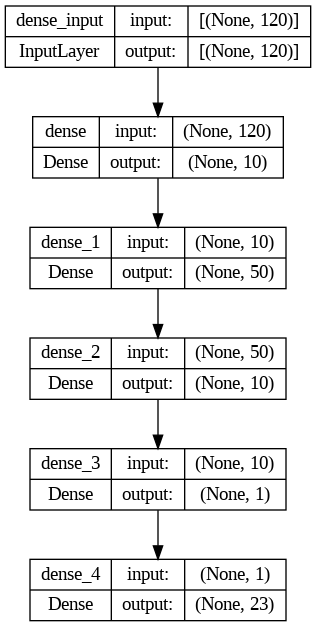

In [25]:
# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=20)

import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('='*50)
model.summary()

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_architecture.png')

In [26]:
def confusion_matrix_func(y_test, y_test_pred):
    
    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf', 'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()
print('Train data')
print(x_train.shape)
print(y_train.shape)
print('='*20)
print('Test data')
print(x_test.shape)
print(y_test.shape)
print('='*20)

Train data
(321113, 120)
(321113, 23)
Test data
(172907, 120)
(172907, 23)


Predicting on the test data:
5404/5404 [==============================] - 5s 927us/step
Completed
Time taken: 0:00:17.443720
Validation score: 0.9959573643635018
Evaluation score: 0.033183977007865906
Recall score: 0.9959573643635018
Precision score: 0.9956526809129241
F1 score: 0.9951450522943253


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


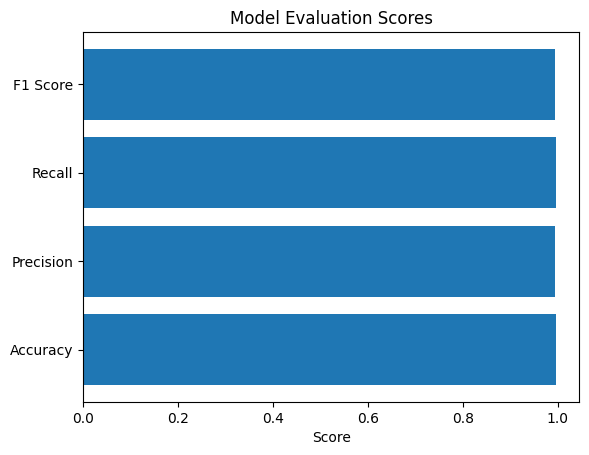

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Measure accuracy
print('Predicting on the test data:')
start = dt.datetime.now()
escore = model.evaluate(x_test, y_test, batch_size=32)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

vscore = metrics.accuracy_score(y_eval, pred)

rscore = recall_score(y_eval, pred, average='weighted')

ascore = precision_score(y_eval, pred, average='weighted')

fscore = f1_score(y_eval, pred, average='weighted')

print('Completed')
print('Time taken:',dt.datetime.now()-start)
print('='*50)
print("Validation score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(fscore))
print('='*50)

# Create a horizontal bar plot
x_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [vscore, ascore, rscore, fscore]
plt.barh(x_labels, scores)

# Add labels and a title
plt.xlabel('Score')
plt.title('Model Evaluation Scores')

# Display the plot
plt.show()
